# neutral drift

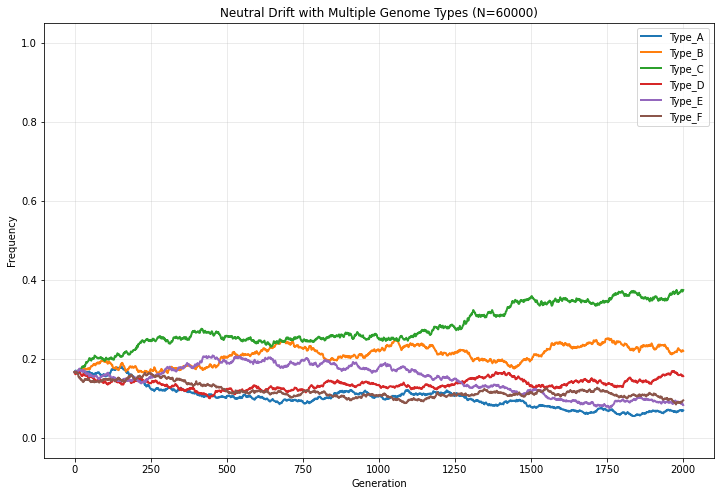

Final state:
  Type_B: 13218 individuals (22.0%)
  Type_C: 22460 individuals (37.4%)
  Type_E: 5000 individuals (8.3%)
  Type_D: 9394 individuals (15.7%)
  Type_F: 5720 individuals (9.5%)
  Type_A: 4208 individuals (7.0%)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def simulate_multiple_genomes(pop_size, initial_counts, generations):
    """
    Simulate neutral drift with multiple genome types.
    
    Parameters:
    pop_size (int): Constant population size
    initial_counts (dict): Initial counts of each genome type
    generations (int): Number of generations to simulate
    
    Returns:
    list: List of Counter objects showing counts per generation
    """
    # Create initial population
    population = []
    for genome_type, count in initial_counts.items():
        population.extend([genome_type] * count)
    
    if len(population) != pop_size:
        raise ValueError("Initial counts must sum to population size")
    
    history = [Counter(population)]
    
    for _ in range(generations):
        # Randomly sample next generation (with replacement)
        next_population = np.random.choice(population, size=pop_size, replace=True)
        population = list(next_population)
        current_counts = Counter(population)
        history.append(current_counts)
        
        # Stop if only one genome type remains
        if len(current_counts) == 1:
            break
            
    return history

# Parameters
POP_SIZE = 60000
GENERATIONS = 2000
initial_size_=int(POP_SIZE/6)

# Initialize with 5 different genome types
initial_counts = {'Type_A': initial_size_, 'Type_B': initial_size_,
                  'Type_C': initial_size_, 'Type_D': initial_size_, 
                  'Type_E': initial_size_, 'Type_F': initial_size_}

# Run simulation
history = simulate_multiple_genomes(POP_SIZE, initial_counts, GENERATIONS)

# Plot results
plt.figure(figsize=(12, 8))
generations = list(range(len(history)))

for genome_type in initial_counts.keys():
    frequencies = [counts.get(genome_type, 0) / POP_SIZE for counts in history]
    plt.plot(generations, frequencies, label=genome_type, linewidth=2)

plt.xlabel('Generation')
plt.ylabel('Frequency')
plt.title(f'Neutral Drift with Multiple Genome Types (N={POP_SIZE})')
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(-0.05, 1.05)
plt.show()

# Print final state
final_state = history[-1]
print("Final state:")
for genome_type, count in final_state.items():
    print(f"  {genome_type}: {count} individuals ({(count/POP_SIZE)*100:.1f}%)")

# all-or-none phenomenon

Simulating stochastic switch...


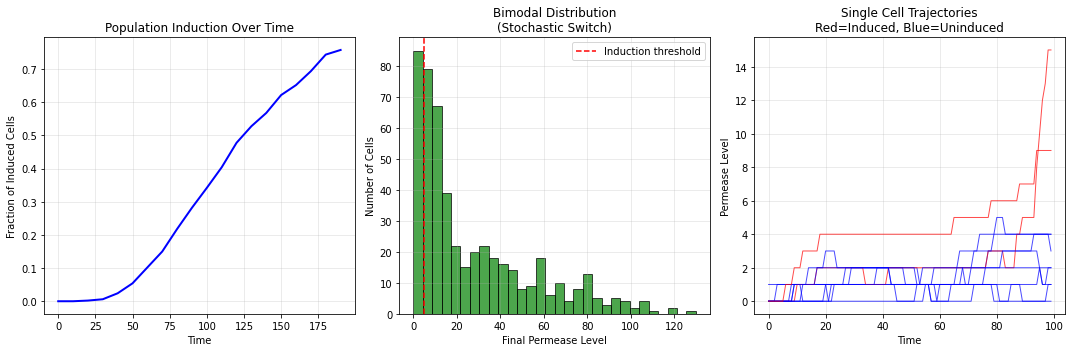


Final Statistics:
Induced cells: 392/500 (78.4%)
Uninduced cells: 108/500 (21.6%)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def simple_stochastic_switch(n_cells=1000, external_inducer=5, max_time=100):
    """
    Simple stochastic model of lac operon positive feedback switch
    """
    # Initialize all cells as uninduced
    permease = np.zeros(n_cells)  # P
    internal_inducer = np.zeros(n_cells)  # I
    
    # Track history
    history = []
    
    for t in range(max_time):
        # Random fluctuations and decisions for each cell
        for i in range(n_cells):
            # 1. Some basal permease production (random)
            if np.random.random() < 0.05:
                permease[i] += 1
            
            # 2. Permease degrades slowly
            if np.random.random() < 0.02 and permease[i] > 0:
                permease[i] -= 1
            
            # 3. Inducer enters based on permease level (THE POSITIVE FEEDBACK)
            uptake_prob = 0.01 + 0.1 * permease[i] / (1 + permease[i])
            if np.random.random() < uptake_prob:
                internal_inducer[i] += 1
            
            # 4. Inducer leaks out
            if np.random.random() < 0.1 and internal_inducer[i] > 0:
                internal_inducer[i] -= 1
            
            # 5. Critical switch: if inducer crosses threshold, boost permease production
            if internal_inducer[i] > 3:  # Switch point
                if np.random.random() < 0.3:  # High production rate
                    permease[i] += 2
        
        # Record state every 10 time steps
        if t % 10 == 0:
            induced = np.sum(permease > 5)
            history.append((t, induced / n_cells, np.mean(permease)))
    
    return history, permease

# Run simulation
print("Simulating stochastic switch...")
history, final_permease = simple_stochastic_switch(n_cells=500, external_inducer=5, max_time=200)

# Convert history to arrays
time_points = [h[0] for h in history]
fraction_induced = [h[1] for h in history]
mean_permease = [h[2] for h in history]

# Plot results
plt.figure(figsize=(15, 5))

# Plot 1: Fraction of induced cells over time
plt.subplot(1, 3, 1)
plt.plot(time_points, fraction_induced, 'b-', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Fraction of Induced Cells')
plt.title('Population Induction Over Time')
plt.grid(alpha=0.3)

# Plot 2: Final distribution - bimodal!
plt.subplot(1, 3, 2)
plt.hist(final_permease, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Final Permease Level')
plt.ylabel('Number of Cells')
plt.title('Bimodal Distribution\n(Stochastic Switch)')
plt.axvline(x=5, color='red', linestyle='--', label='Induction threshold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 3: Single cell example trajectories
plt.subplot(1, 3, 3)
# Simulate a few individual cells
for cell in range(10):
    permease_single = 0
    inducer_single = 0
    trace = []
    
    for t in range(100):
        # Same rules as above
        if np.random.random() < 0.05:
            permease_single += 1
        if np.random.random() < 0.02 and permease_single > 0:
            permease_single -= 1
        
        uptake_prob = 0.01 + 0.1 * permease_single / (1 + permease_single)
        if np.random.random() < uptake_prob:
            inducer_single += 1
        if np.random.random() < 0.1 and inducer_single > 0:
            inducer_single -= 1
        if inducer_single > 3:
            if np.random.random() < 0.3:
                permease_single += 2
        
        trace.append(permease_single)
    
    color = 'red' if trace[-1] > 5 else 'blue'
    plt.plot(trace, color=color, alpha=0.7, linewidth=1)

plt.xlabel('Time')
plt.ylabel('Permease Level')
plt.title('Single Cell Trajectories\nRed=Induced, Blue=Uninduced')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
induced_cells = np.sum(final_permease > 5)
total_cells = len(final_permease)
print(f"\nFinal Statistics:")
print(f"Induced cells: {induced_cells}/{total_cells} ({induced_cells/total_cells*100:.1f}%)")
print(f"Uninduced cells: {total_cells - induced_cells}/{total_cells} ({(total_cells-induced_cells)/total_cells*100:.1f}%)")